Autor: Filip Kłos 20453

In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.T9O9UN_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.T9O9UN_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [4]:
BUFFER_SIZE = 1000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

In [5]:
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)
validation_inputs, validation_targets = next(iter(validation_data))
print(validation_inputs.shape, validation_targets.shape)

(6000, 28, 28, 1) (6000,)


In [6]:
input_size = 784
output_size = 10

hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
NUM_EPOCHS = 30

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_data, epochs=NUM_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=1)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7961 - loss: 0.7129 - val_accuracy: 0.9382 - val_loss: 0.2176
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9436 - loss: 0.1952 - val_accuracy: 0.9520 - val_loss: 0.1661
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9583 - loss: 0.1425 - val_accuracy: 0.9585 - val_loss: 0.1383
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9685 - loss: 0.1112 - val_accuracy: 0.9613 - val_loss: 0.1309
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9731 - loss: 0.0924 - val_accuracy: 0.9635 - val_loss: 0.1205
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9749 - loss: 0.0833 - val_accuracy: 0.9658 - val_loss: 0.1138
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9784 - loss: 0.0719 - val_accuracy: 0.9702 - val_loss: 0.1050
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accuracy: 

In [8]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - accuracy: 0.9709 - loss: 0.0927
Test loss: 0.09. Test accuracy: 97.09%


Mounted at /content/drive


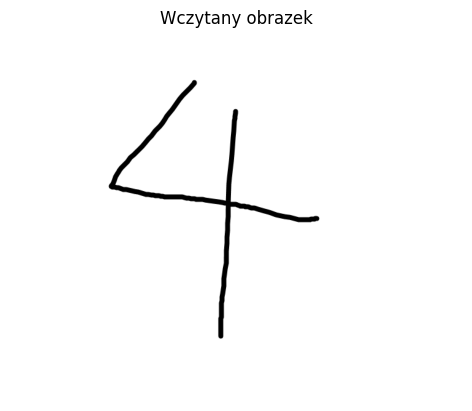

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Przewidywana cyfra: 5


In [9]:
from google.colab import drive
drive.mount('/content/drive')
sciezka_pliku = '/content/drive/MyDrive/Colab Notebooks/Cztery.png'

image = cv2.imread(sciezka_pliku, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Wczytany obrazek')
plt.axis('off')
plt.show()

image_resized = cv2.resize(image, (28, 28))

image_inverted = 255 - image_resized

image_normalized = image_inverted / 255.0

image_reshaped = np.reshape(image_normalized, (1, 28, 28, 1))

predictions = model.predict(image_reshaped)

predicted_digit = np.argmax(predictions)

print("Przewidywana cyfra:", predicted_digit)